<a href="https://colab.research.google.com/github/Ary-cane10/Ary-cane/blob/master/R%20ChatGPT%20ITM615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
install.packages("ggplot2")
install.packages("corrplot")
install.packages("pROC")
install.packages("caret")
install.packages("car")
install.packages("plotrix")
install.packages("lattice")
install.packages("pscl")
install.packages("carData")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R

In [10]:
# Set the working directory if needed (optional)
# setwd("path/to/your/directory")

# Load the dataset
churn_data <- read.csv("/content/churn-bigml.csv")

# Display the first few rows of the dataset
head(churn_data)

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
6,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [11]:
dim(churn_data)

[1] 3333   20

In [12]:
names(churn_data)

[1] "State"                  "Account.length"         "Area.code"             
 [4] "International.plan"     "Voice.mail.plan"        "Number.vmail.messages" 
 [7] "Total.day.minutes"      "Total.day.calls"        "Total.day.charge"      
[10] "Total.eve.minutes"      "Total.eve.calls"        "Total.eve.charge"      
[13] "Total.night.minutes"    "Total.night.calls"      "Total.night.charge"    
[16] "Total.intl.minutes"     "Total.intl.calls"       "Total.intl.charge"     
[19] "Customer.service.calls" "Churn"

In [13]:
summary(churn_data)

    State           Account.length    Area.code     International.plan
 Length:3333        Min.   :  1.0   Min.   :408.0   Length:3333       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.2                     
                    3rd Qu.:127.0   3rd Qu.:510.0                     
                    Max.   :243.0   Max.   :510.0                     
 Voice.mail.plan    Number.vmail.messages Total.day.minutes Total.day.calls
 Length:3333        Min.   : 0.000        Min.   :  0.0     Min.   :  0.0  
 Class :character   1st Qu.: 0.000        1st Qu.:143.7     1st Qu.: 87.0  
 Mode  :character   Median : 0.000        Median :179.4     Median :101.0  
                    Mean   : 8.099        Mean   :179.8     Mean   :100.4  
                    3rd Qu.:20.000        3rd Qu.:216.4     3rd Qu.:114.0  
                    Max.   :51.000        Max. 

In [15]:
str(churn_data)

'data.frame':	3333 obs. of  20 variables:
 $ State                 : chr  "KS" "OH" "NJ" "OH" ...
 $ Account.length        : int  128 107 137 84 75 118 121 147 141 74 ...
 $ Area.code             : int  415 415 415 408 415 510 510 415 415 415 ...
 $ International.plan    : chr  "No" "No" "No" "Yes" ...
 $ Voice.mail.plan       : chr  "Yes" "Yes" "No" "No" ...
 $ Number.vmail.messages : int  25 26 0 0 0 0 24 0 37 0 ...
 $ Total.day.minutes     : num  265 162 243 299 167 ...
 $ Total.day.calls       : int  110 123 114 71 113 98 88 79 84 127 ...
 $ Total.day.charge      : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Total.eve.minutes     : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Total.eve.calls       : int  99 103 110 88 122 101 108 94 111 148 ...
 $ Total.eve.charge      : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Total.night.minutes   : num  245 254 163 197 187 ...
 $ Total.night.calls     : int  91 103 104 89 121 118 118 96 97 94 ...
 $ Total.night.charge    : num  11.01 11.45 7.32 8.86 8.41 ..

In [16]:
# Check unique values in the Churn variable
unique(churn_data$Churn)

# Convert Churn variable to numeric (0 = "False", 1 = "True")
churn_data$Churn <- ifelse(churn_data$Churn == "True", 1, 0)

# Verify the conversion
table(churn_data$Churn)


[1] "False" "True"


   0    1 
2850  483 

In [17]:
# Check for missing values in each column
missing_values <- colSums(is.na(churn_data))

# Display the result
missing_values


State         Account.length              Area.code 
                     0                      0                      0 
    International.plan        Voice.mail.plan  Number.vmail.messages 
                     0                      0                      0 
     Total.day.minutes        Total.day.calls       Total.day.charge 
                     0                      0                      0 
     Total.eve.minutes        Total.eve.calls       Total.eve.charge 
                     0                      0                      0 
   Total.night.minutes      Total.night.calls     Total.night.charge 
                     0                      0                      0 
    Total.intl.minutes       Total.intl.calls      Total.intl.charge 
                     0                      0                      0 
Customer.service.calls                  Churn 
                     0                      0

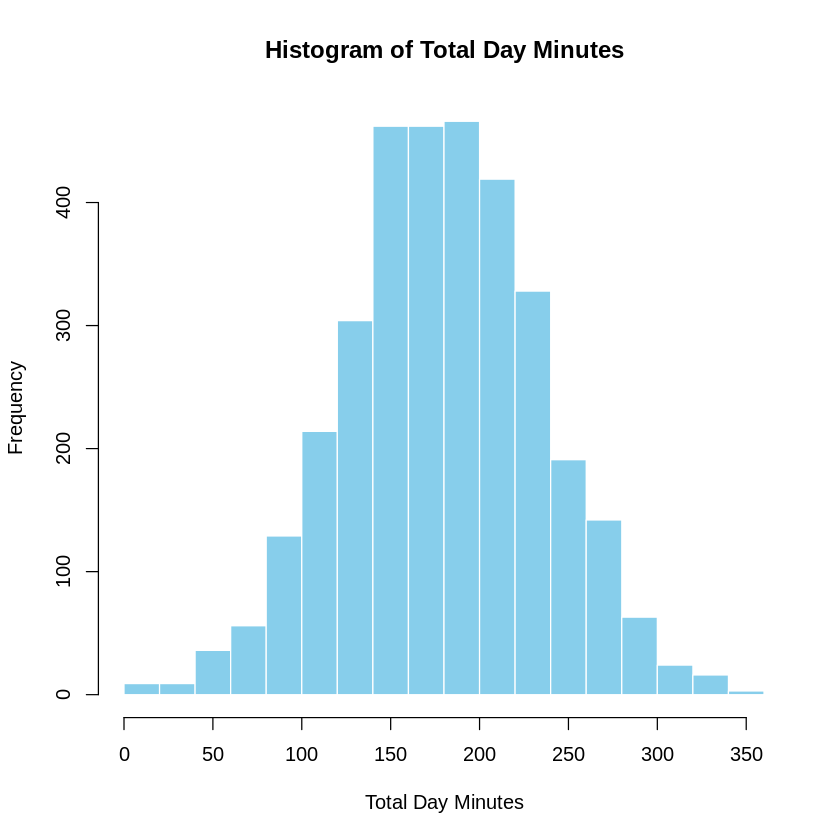

In [18]:
# Histogram for Total.day.minutes
hist(churn_data$Total.day.minutes,
     main = "Histogram of Total Day Minutes",
     xlab = "Total Day Minutes",
     col = "skyblue",
     border = "white")


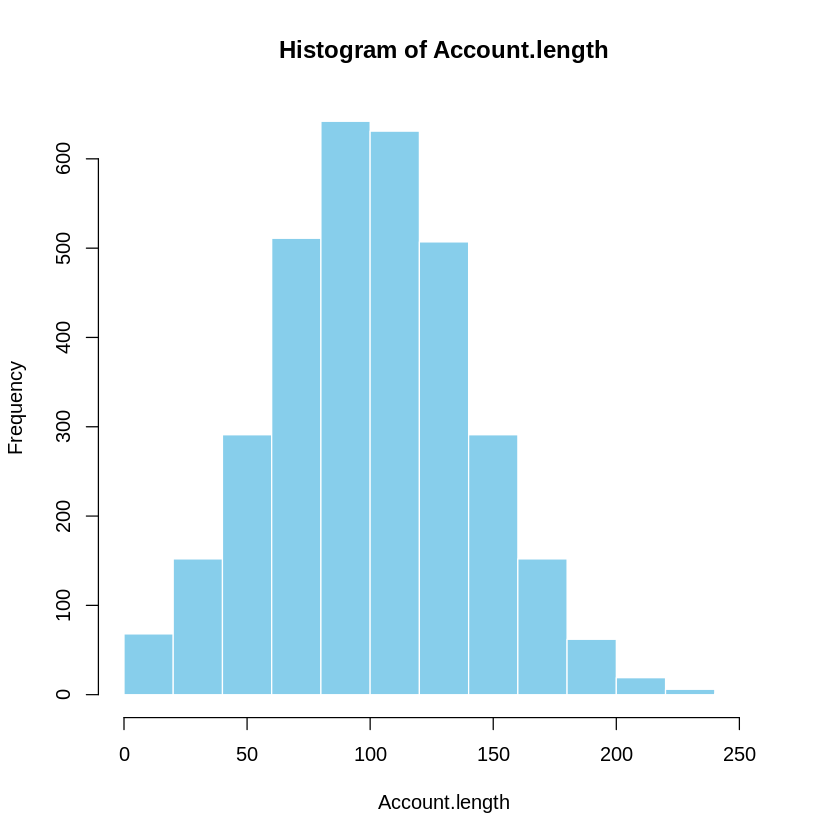

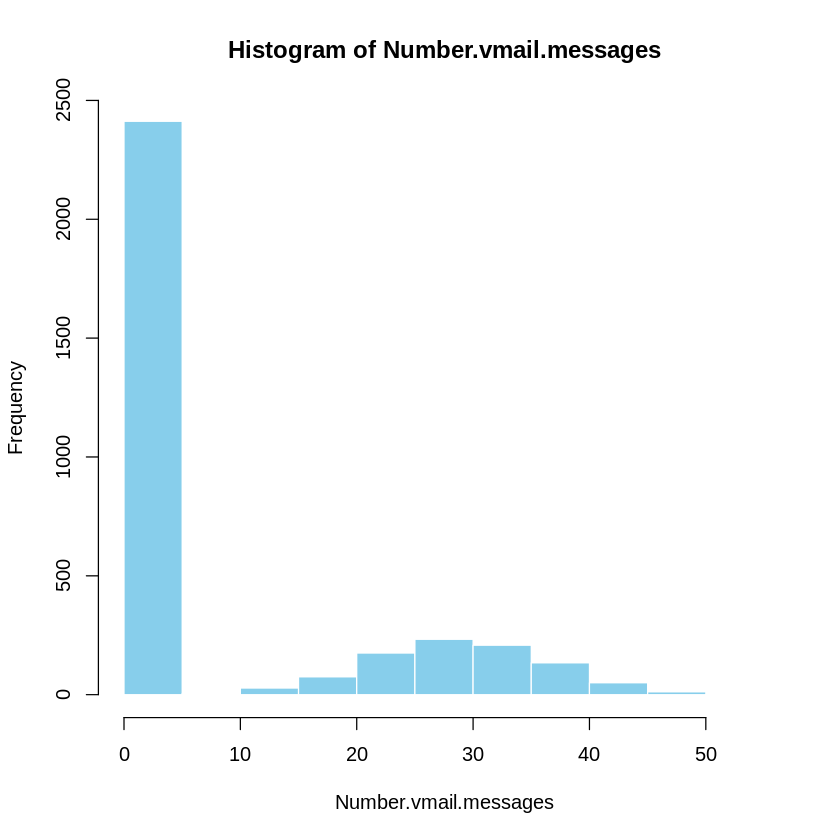

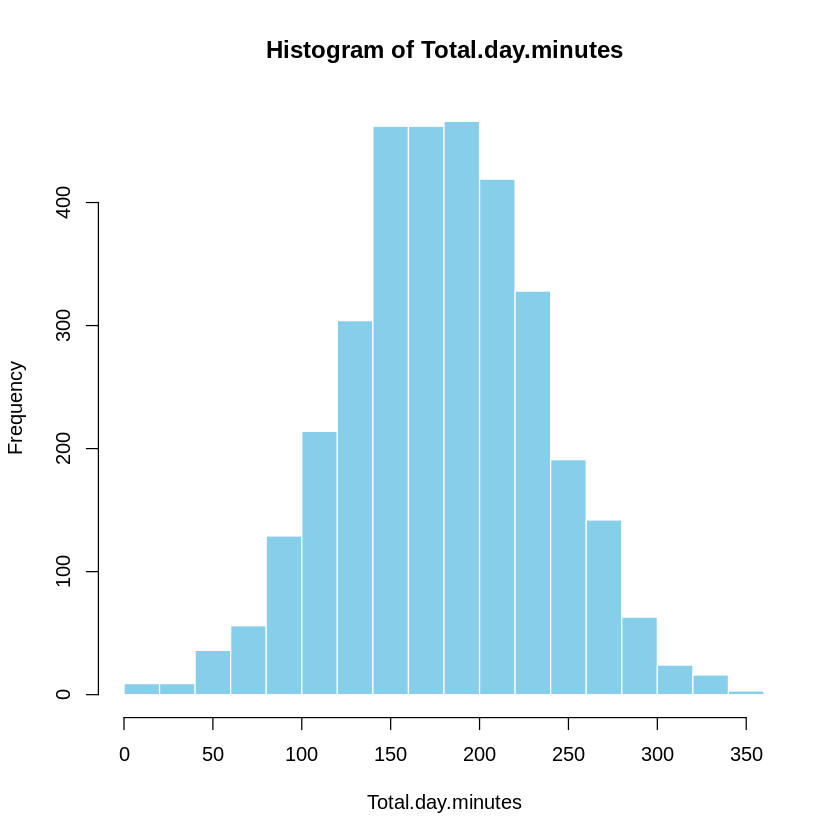

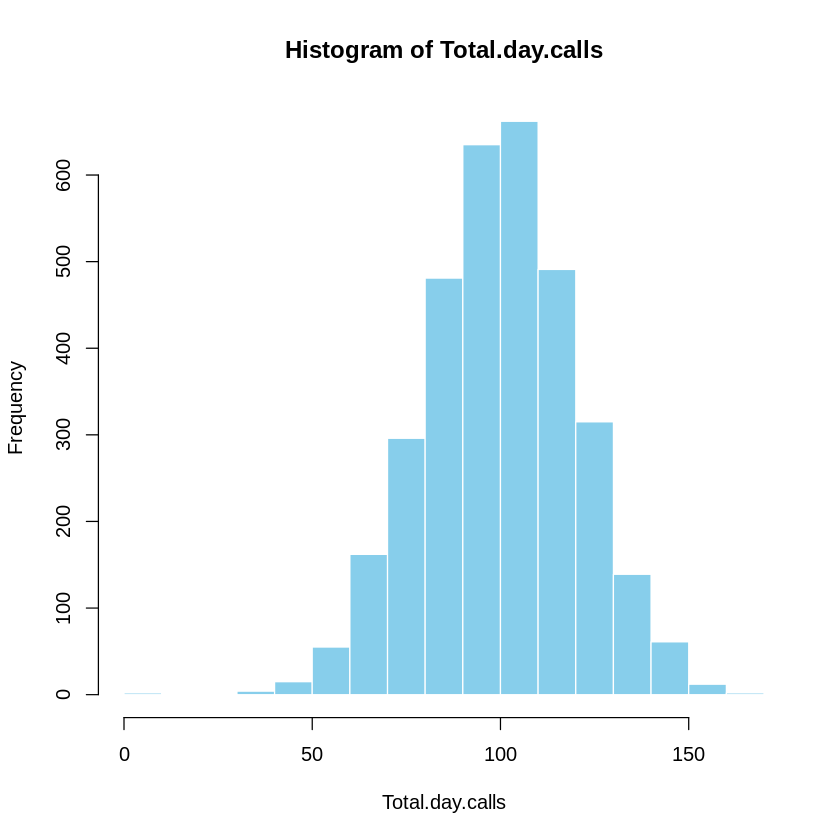

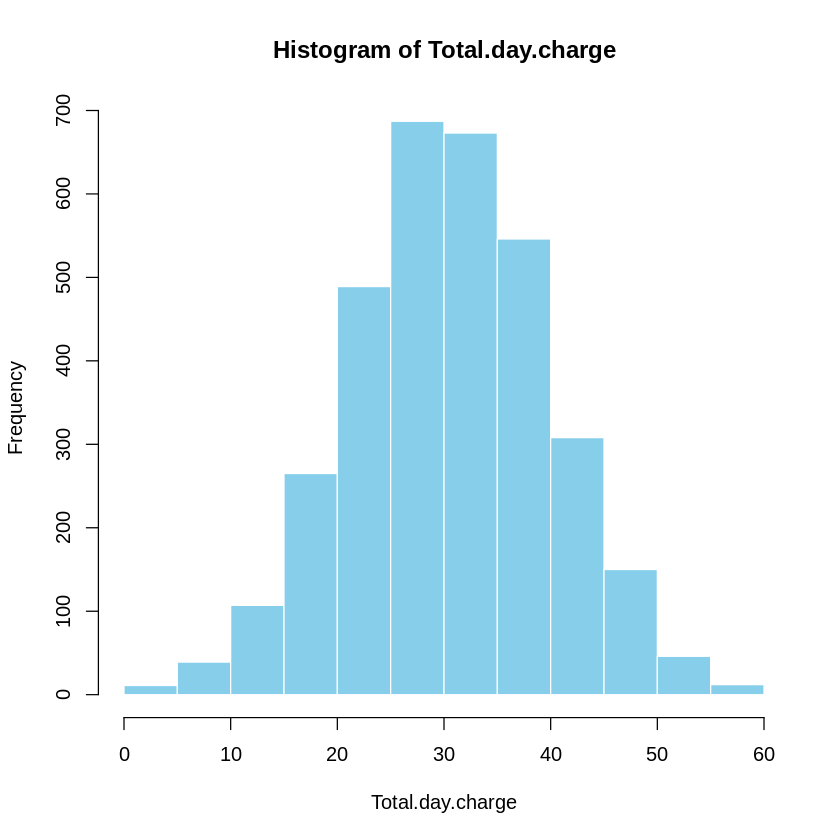

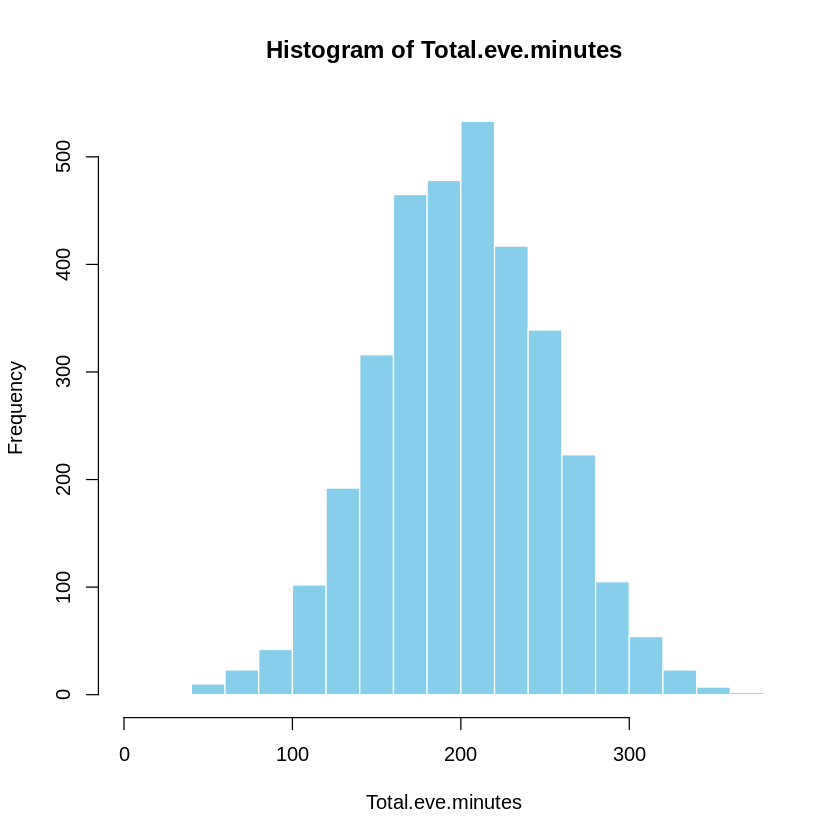

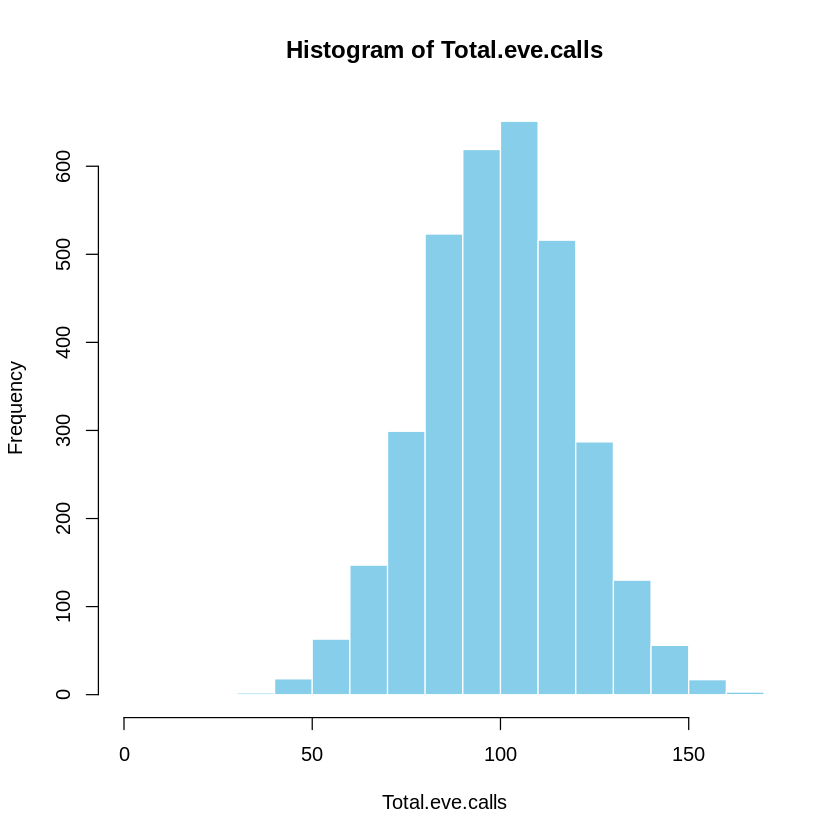

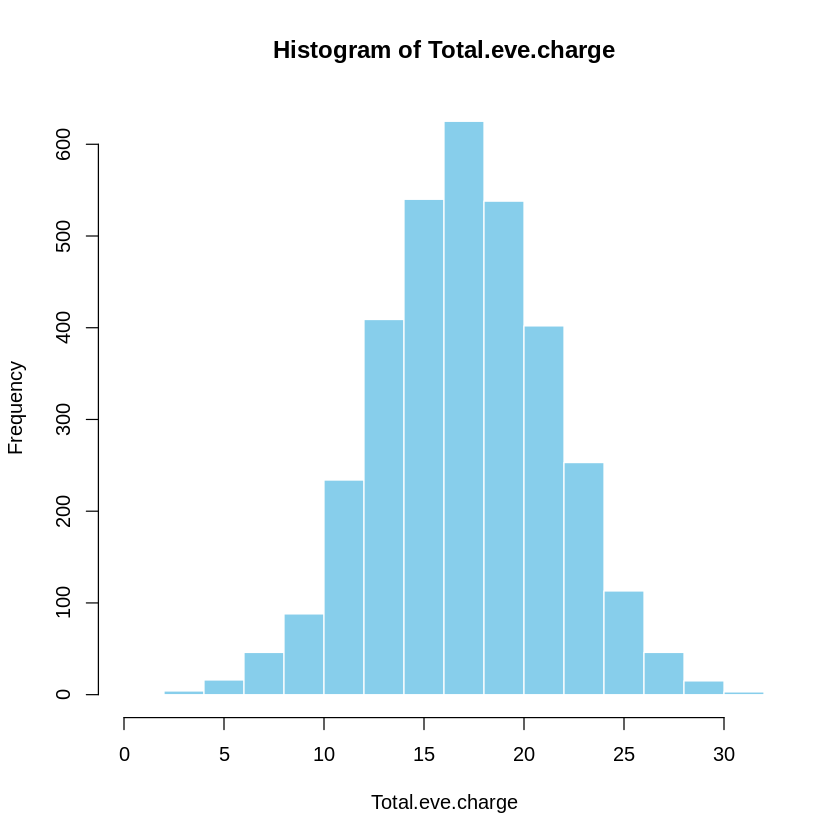

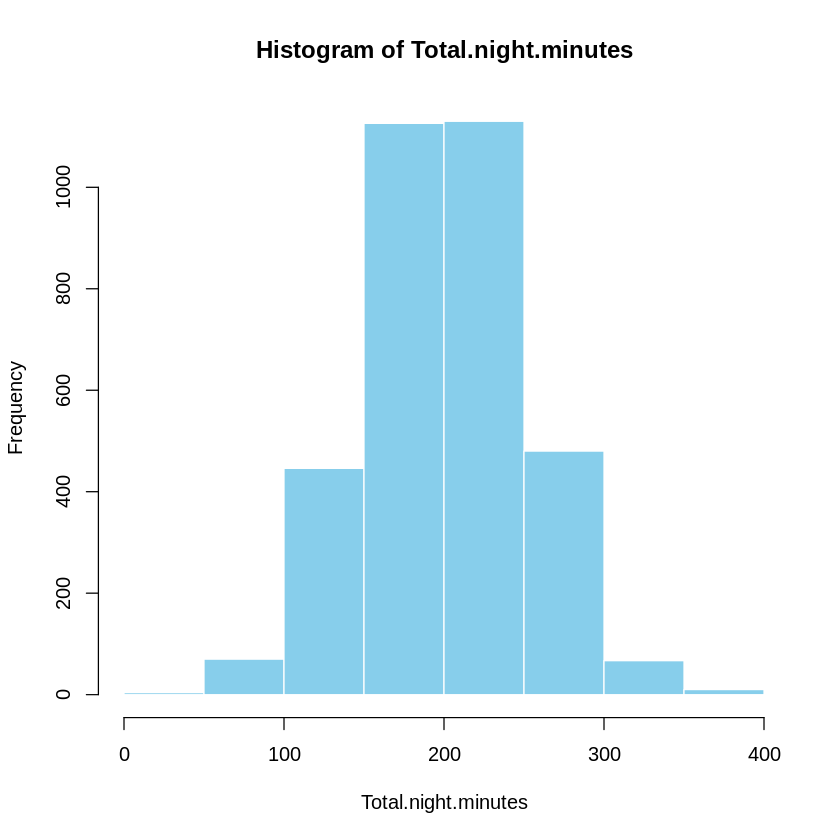

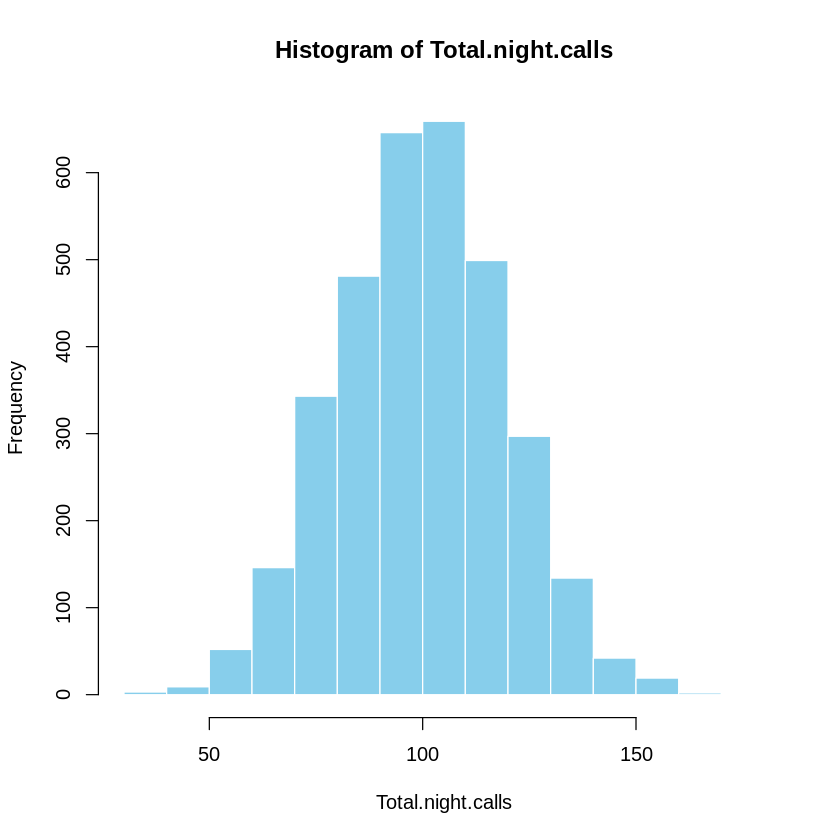

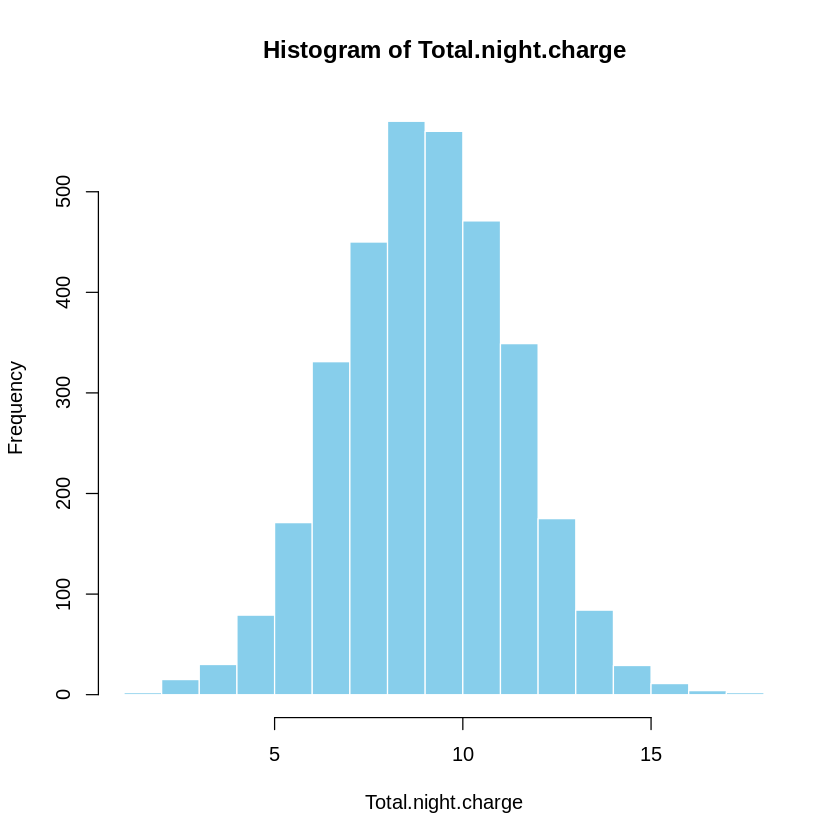

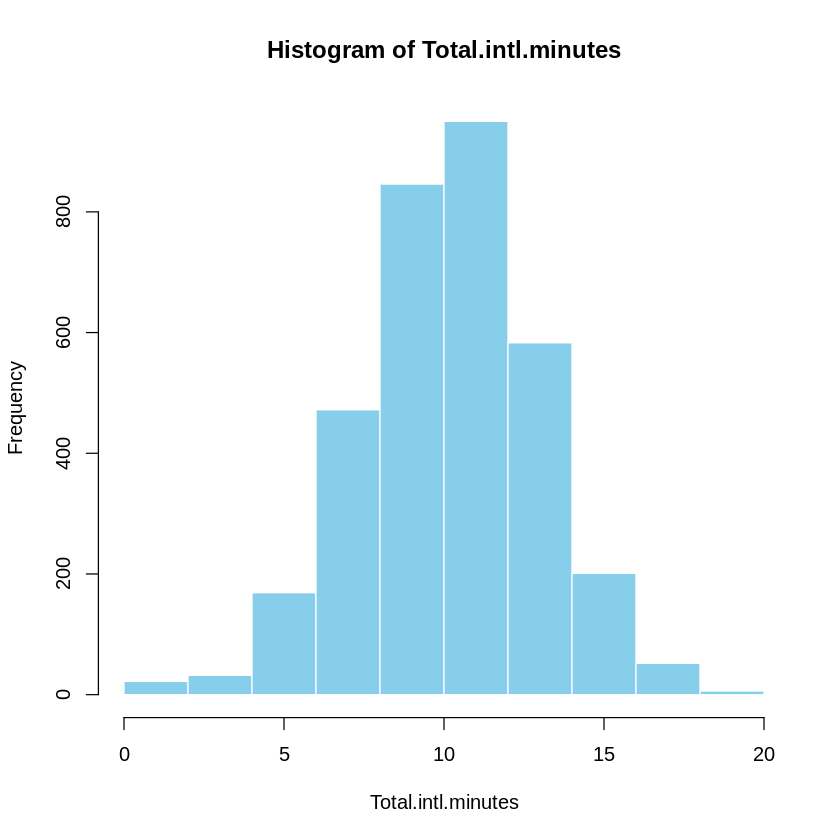

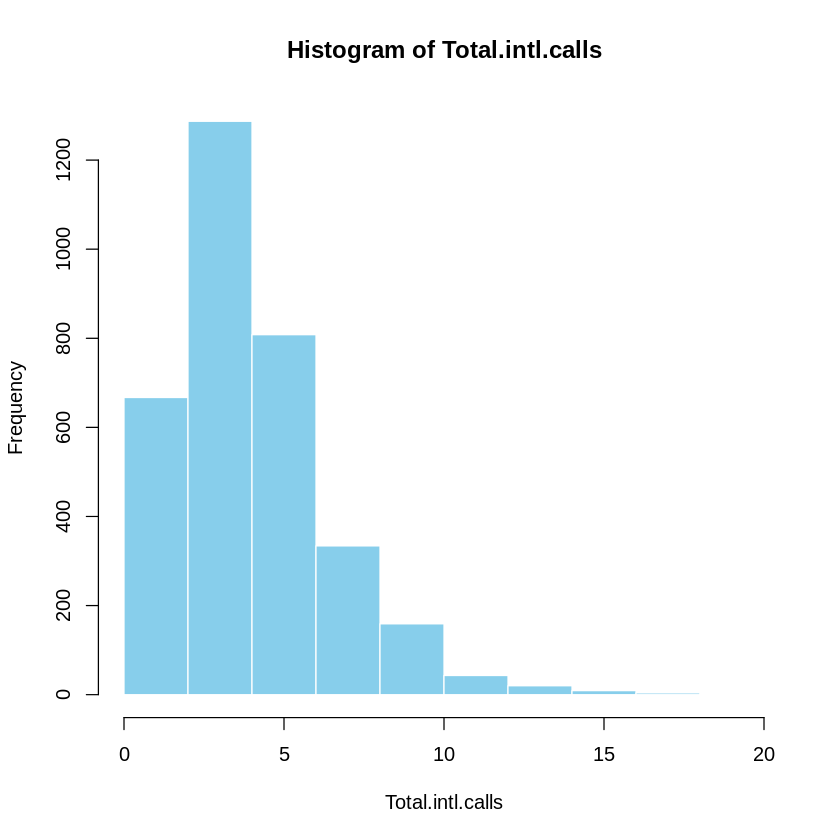

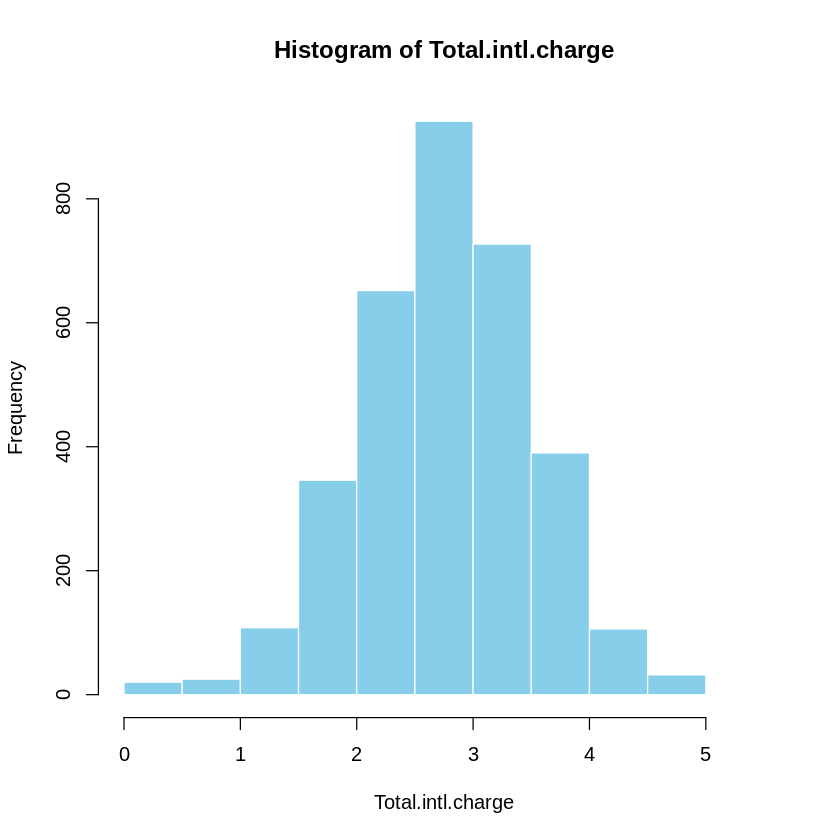

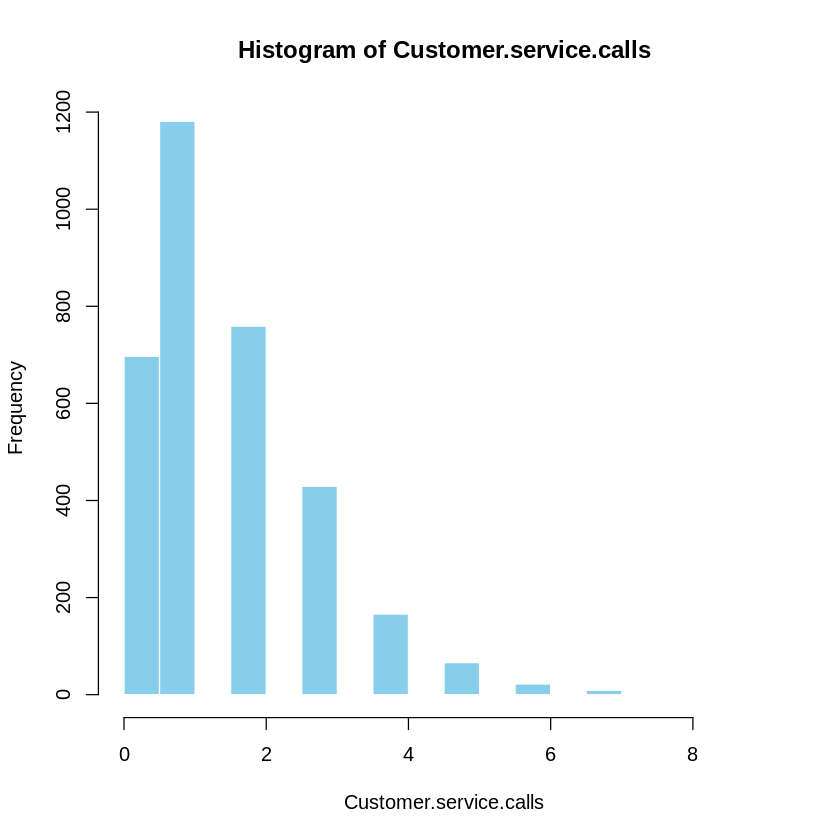

In [19]:
# List of numeric column names
numeric_columns <- c('Account.length', 'Number.vmail.messages', 'Total.day.minutes',
                     'Total.day.calls', 'Total.day.charge', 'Total.eve.minutes',
                     'Total.eve.calls', 'Total.eve.charge', 'Total.night.minutes',
                     'Total.night.calls', 'Total.night.charge', 'Total.intl.minutes',
                     'Total.intl.calls', 'Total.intl.charge', 'Customer.service.calls')

# Loop through numeric columns and create histograms
for (col in numeric_columns) {
  hist(churn_data[[col]],
       main = paste("Histogram of", col),
       xlab = col,
       col = "skyblue",
       border = "white")
}


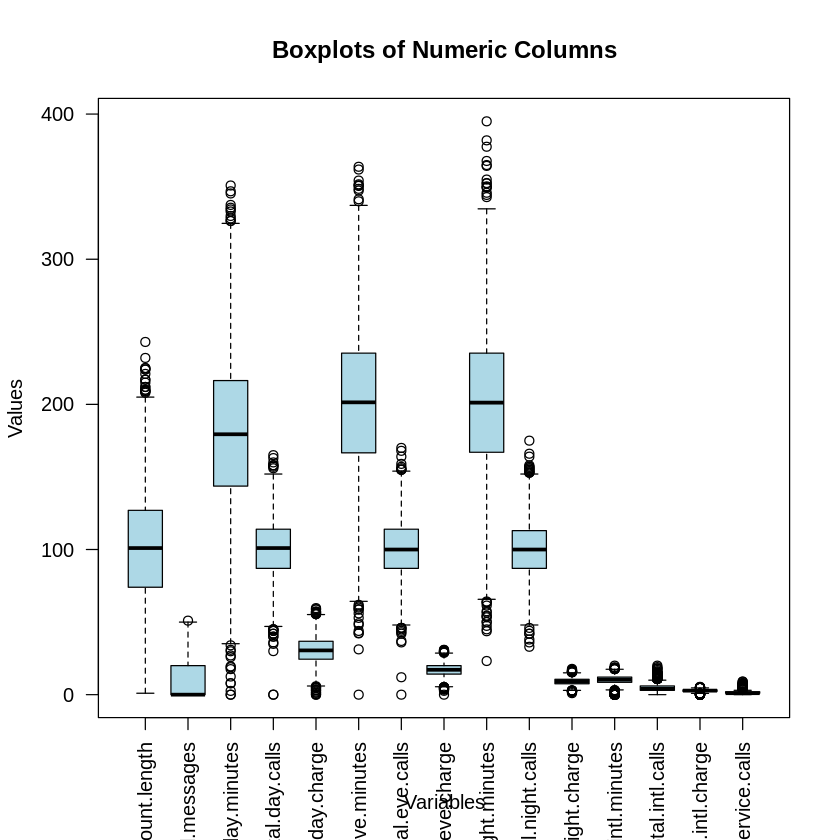

In [20]:
# List of numeric column names
numeric_columns <- c('Account.length', 'Number.vmail.messages', 'Total.day.minutes',
                     'Total.day.calls', 'Total.day.charge', 'Total.eve.minutes',
                     'Total.eve.calls', 'Total.eve.charge', 'Total.night.minutes',
                     'Total.night.calls', 'Total.night.charge', 'Total.intl.minutes',
                     'Total.intl.calls', 'Total.intl.charge', 'Customer.service.calls')

# Boxplot for all numeric columns
boxplot(churn_data[numeric_columns],
        main = "Boxplots of Numeric Columns",
        las = 2, # Make column names vertical
        col = "lightblue",
        outline = TRUE, # Show outliers
        xlab = "Variables",
        ylab = "Values")


Loading required package: corrplot

corrplot 0.95 loaded



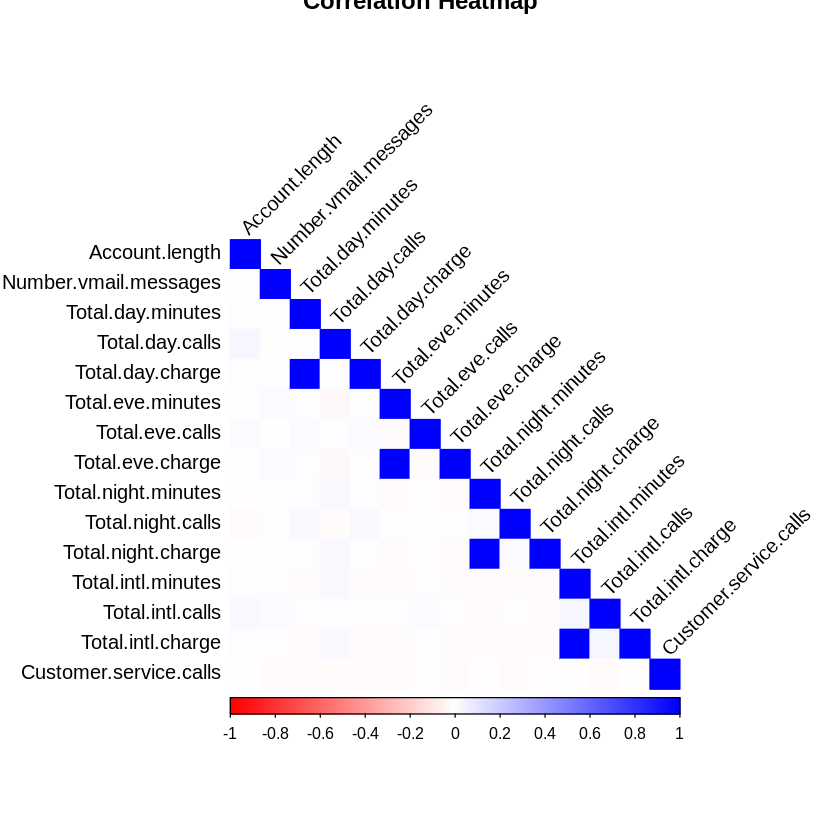

In [21]:
# Load library for heatmap visualization
if(!require("corrplot")) install.packages("corrplot")
library(corrplot)

# Compute correlation matrix for numeric columns
cor_matrix <- cor(churn_data[numeric_columns], use = "complete.obs")

# Visualize the correlation matrix as a heatmap
corrplot(cor_matrix, method = "color",
         type = "lower", # Show lower triangle
         tl.col = "black", # Text label color
         tl.srt = 45, # Rotate labels
         col = colorRampPalette(c("red", "white", "blue"))(200),
         main = "Correlation Heatmap")


In [22]:
# List of non-numeric column names
non_numeric_columns <- c('State', 'International.plan', 'Voice.mail.plan', 'Churn')

# Summary of each non-numeric column
for (col in non_numeric_columns) {
  cat("\nFrequency Table for", col, ":\n")
  print(table(churn_data[[col]]))
}



Frequency Table for State :

 AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA 
 52  80  55  64  34  66  74  54  61  63  54  53  44  73  58  71  70  59  51  65 
 MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI 
 70  62  73  84  63  65  68  68  62  61  56  68  62  66  83  78  61  78  45  65 
 SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY 
 60  60  53  72  72  77  73  66  78 106  77 

Frequency Table for International.plan :

  No  Yes 
3010  323 

Frequency Table for Voice.mail.plan :

  No  Yes 
2411  922 

Frequency Table for Churn :

   0    1 
2850  483 


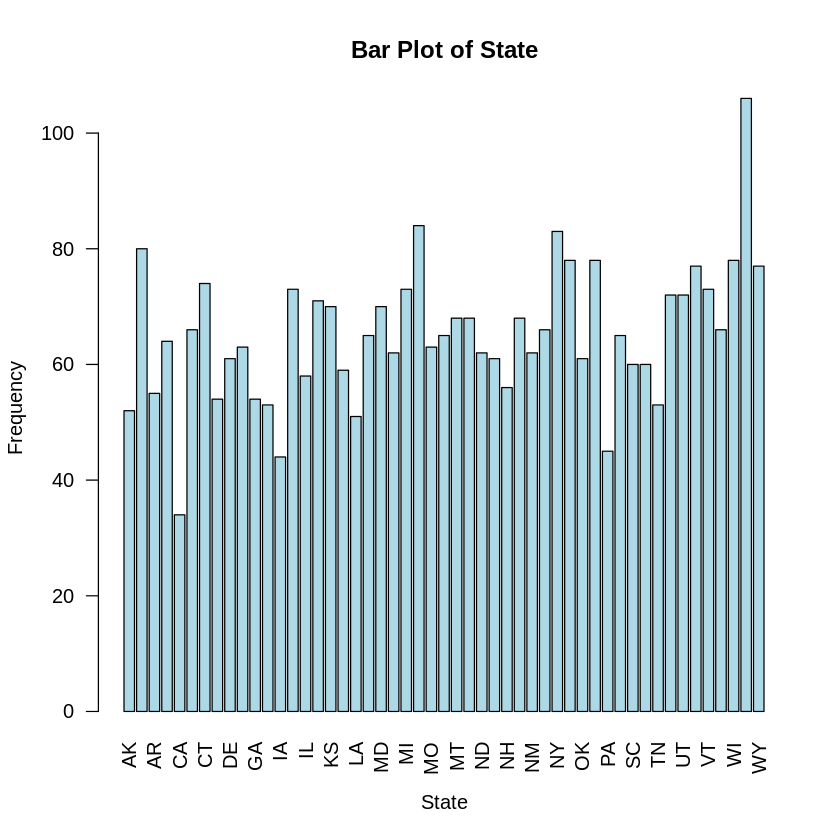

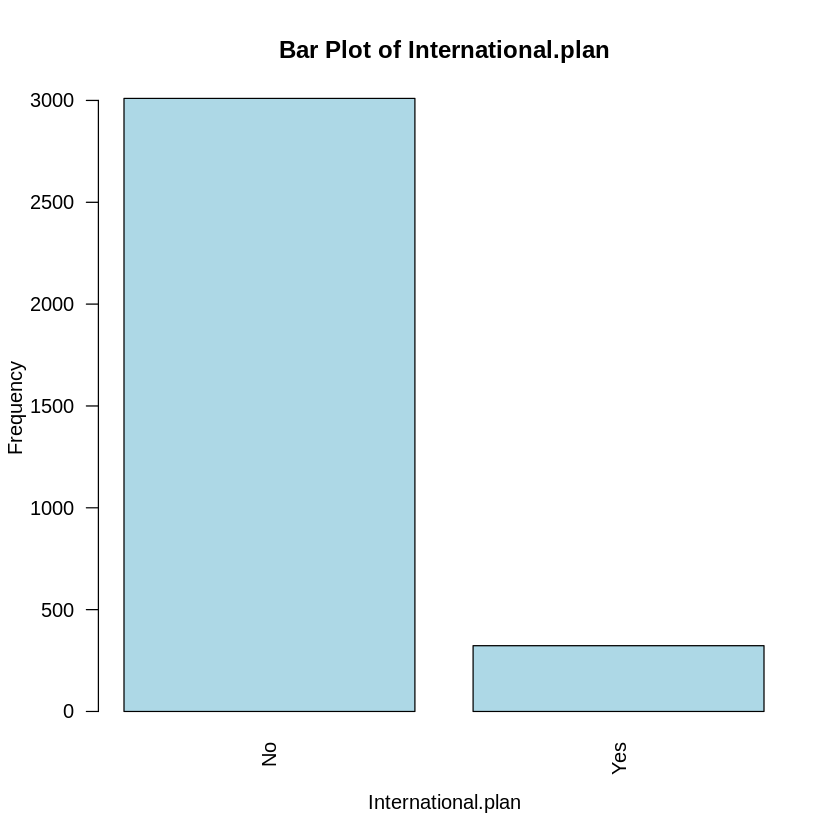

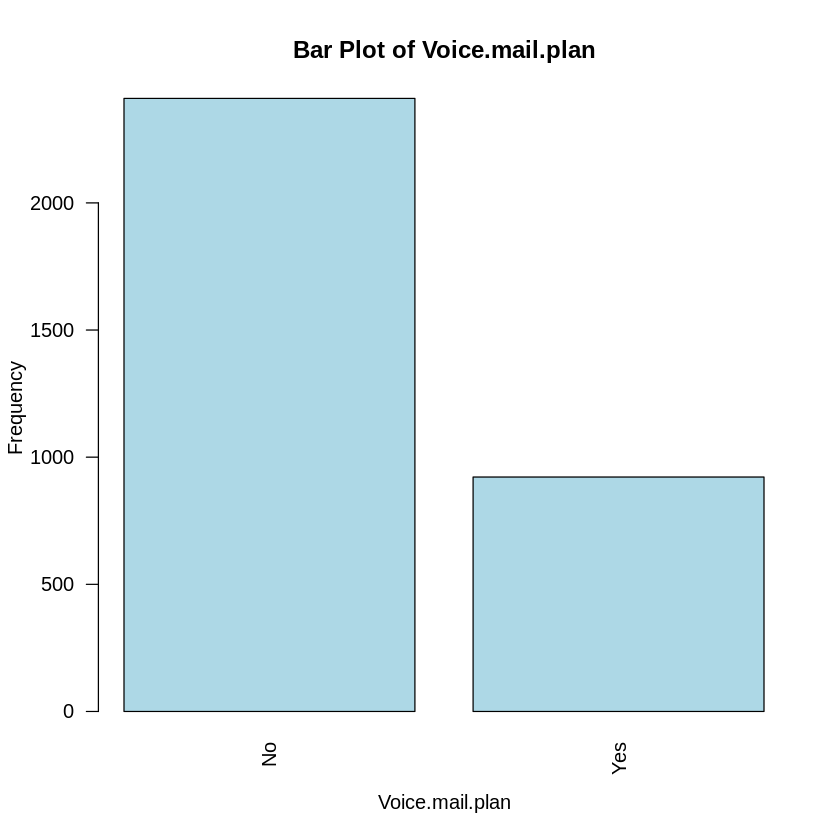

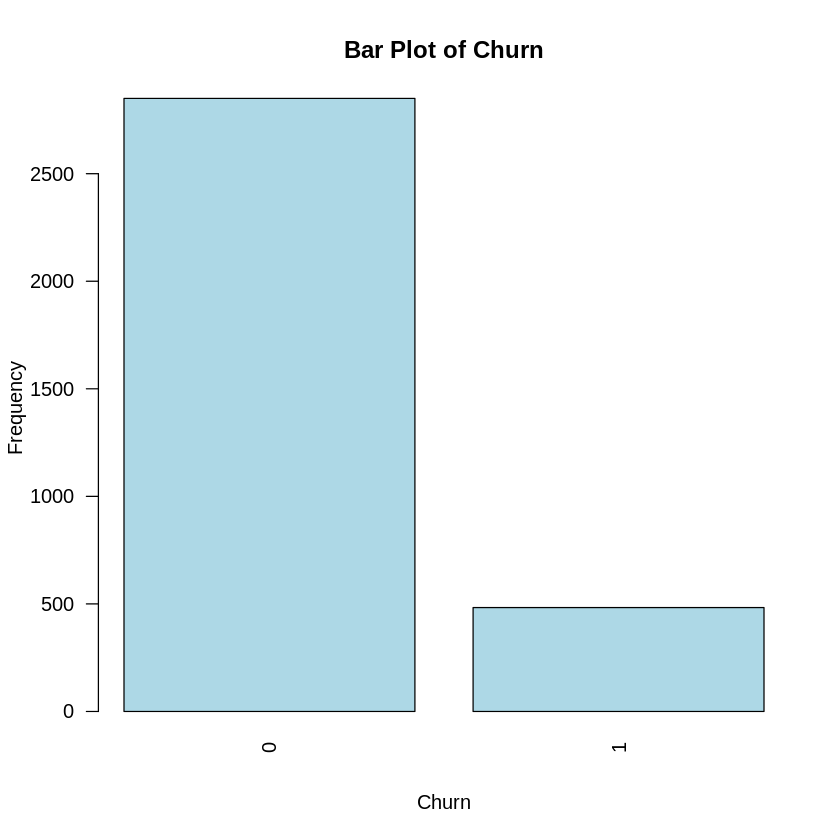

In [23]:
# Bar plots for non-numeric columns
for (col in non_numeric_columns) {
  barplot(table(churn_data[[col]]),
          main = paste("Bar Plot of", col),
          xlab = col,
          ylab = "Frequency",
          col = "lightblue",
          las = 2) # Rotate labels if needed
}


In [25]:
# Summarize the non-numeric columns
non_numeric_columns <- c('State', 'International.plan', 'Voice.mail.plan', 'Churn')
summary(churn_data[non_numeric_columns])


    State           International.plan Voice.mail.plan        Churn       
 Length:3333        Length:3333        Length:3333        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Mode  :character   Median :0.0000  
                                                          Mean   :0.1449  
                                                          3rd Qu.:0.0000  
                                                          Max.   :1.0000  

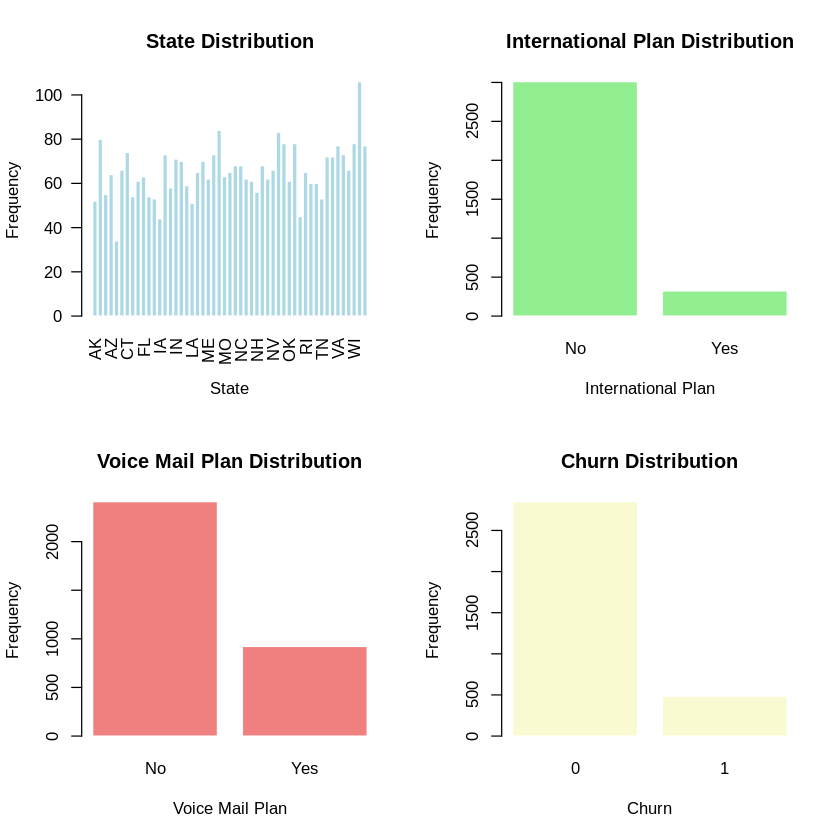

In [26]:
# Visualize each non-numeric column with a bar plot
par(mfrow = c(2, 2))  # Create a 2x2 grid for displaying plots

# Bar plot for 'State'
barplot(table(churn_data$State),
        main = "State Distribution",
        col = "lightblue",
        border = "white",
        las = 2, # Rotate axis labels if needed
        xlab = "State",
        ylab = "Frequency")

# Bar plot for 'International.plan'
barplot(table(churn_data$International.plan),
        main = "International Plan Distribution",
        col = "lightgreen",
        border = "white",
        xlab = "International Plan",
        ylab = "Frequency")

# Bar plot for 'Voice.mail.plan'
barplot(table(churn_data$Voice.mail.plan),
        main = "Voice Mail Plan Distribution",
        col = "lightcoral",
        border = "white",
        xlab = "Voice Mail Plan",
        ylab = "Frequency")

# Bar plot for 'Churn'
barplot(table(churn_data$Churn),
        main = "Churn Distribution",
        col = "lightgoldenrodyellow",
        border = "white",
        xlab = "Churn",
        ylab = "Frequency")


In [27]:
# Convert to factors (if not already)
churn_data$State <- as.factor(churn_data$State)
churn_data$International.plan <- as.factor(churn_data$International.plan)
churn_data$Voice.mail.plan <- as.factor(churn_data$Voice.mail.plan)
churn_data$Churn <- as.factor(churn_data$Churn)


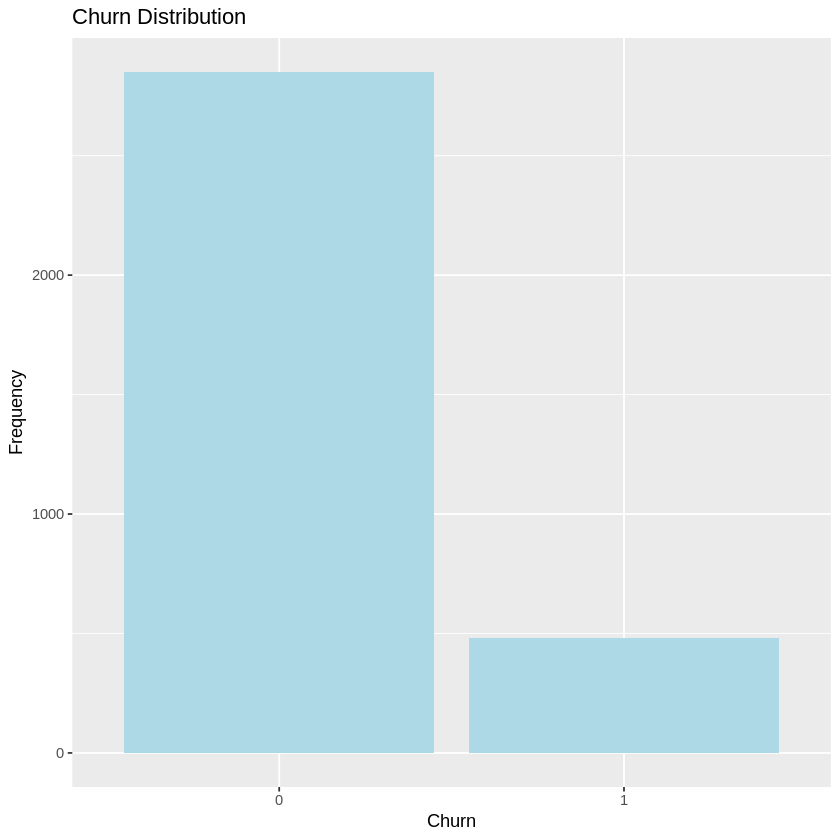

In [28]:
library(ggplot2)

# Plot for 'Churn' as an example
ggplot(churn_data, aes(x = Churn)) +
  geom_bar(fill = "lightblue") +
  ggtitle("Churn Distribution") +
  xlab("Churn") +
  ylab("Frequency")


In [29]:
# Remove 'State' and 'Area.code' columns
churn_data <- churn_data[ , !(names(churn_data) %in% c("State", "Area.code"))]

# Verify the removal
names(churn_data)


[1] "Account.length"         "International.plan"     "Voice.mail.plan"       
 [4] "Number.vmail.messages"  "Total.day.minutes"      "Total.day.calls"       
 [7] "Total.day.charge"       "Total.eve.minutes"      "Total.eve.calls"       
[10] "Total.eve.charge"       "Total.night.minutes"    "Total.night.calls"     
[13] "Total.night.charge"     "Total.intl.minutes"     "Total.intl.calls"      
[16] "Total.intl.charge"      "Customer.service.calls" "Churn"

In [32]:
# Load required library for oversampling
if (!require("ROSE")) install.packages("ROSE")
library(ROSE)

# Split data into training (60%) and testing (40%)
set.seed(123)  # Set seed for reproducibility
train_indices <- sample(1:nrow(churn_data), size = 0.6 * nrow(churn_data))
train_data <- churn_data[train_indices, ]
test_data <- churn_data[-train_indices, ]

# Oversample Churn = 1 by a factor of 5 in the training data
# Extract Churn = 1 and Churn = 0 subsets
churn_1 <- train_data[train_data$Churn == 1, ]
churn_0 <- train_data[train_data$Churn == 0, ]

# Oversample Churn = 1 by replicating it 5 times
oversampled_churn_1 <- churn_1[rep(1:nrow(churn_1), 5), ]

# Combine oversampled Churn = 1 with original Churn = 0
train_data_balanced <- rbind(oversampled_churn_1, churn_0)

# Shuffle the training data
train_data_balanced <- train_data_balanced[sample(1:nrow(train_data_balanced)), ]

# Check the class distribution in the training data
table(train_data_balanced$Churn)

# Verify the split
cat("Training Data:", nrow(train_data_balanced), "rows\n")
cat("Testing Data:", nrow(test_data), "rows\n")


Loading required package: ROSE

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ROSE’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded ROSE 0.0-4





   0    1 
1695 1520 

Training Data: 3215 rows
Testing Data: 1334 rows



Call:
glm(formula = Churn ~ ., family = binomial, data = train_data_balanced)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.653020   0.556769 -13.745  < 2e-16 ***
Account.length           0.001170   0.001103   1.061  0.28878    
International.planYes    2.089774   0.136362  15.325  < 2e-16 ***
Voice.mail.planYes      -3.618741   0.482598  -7.498 6.46e-14 ***
Number.vmail.messages    0.087698   0.014588   6.012 1.84e-09 ***
Total.day.minutes        2.890559   2.572991   1.123  0.26126    
Total.day.calls          0.001862   0.002100   0.887  0.37527    
Total.day.charge       -16.916232  15.135085  -1.118  0.26370    
Total.eve.minutes        0.575993   1.285501   0.448  0.65410    
Total.eve.calls          0.004643   0.002216   2.095  0.03613 *  
Total.eve.charge        -6.703706  15.123437  -0.443  0.65757    
Total.night.minutes     -0.500512   0.670848  -0.746  0.45561    
Total.night.calls       -0.002979   0.002235  -1

         Actual
Predicted   0   1
        0 889  52
        1 266 127
Accuracy: 0.7616192 


Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.7938717 


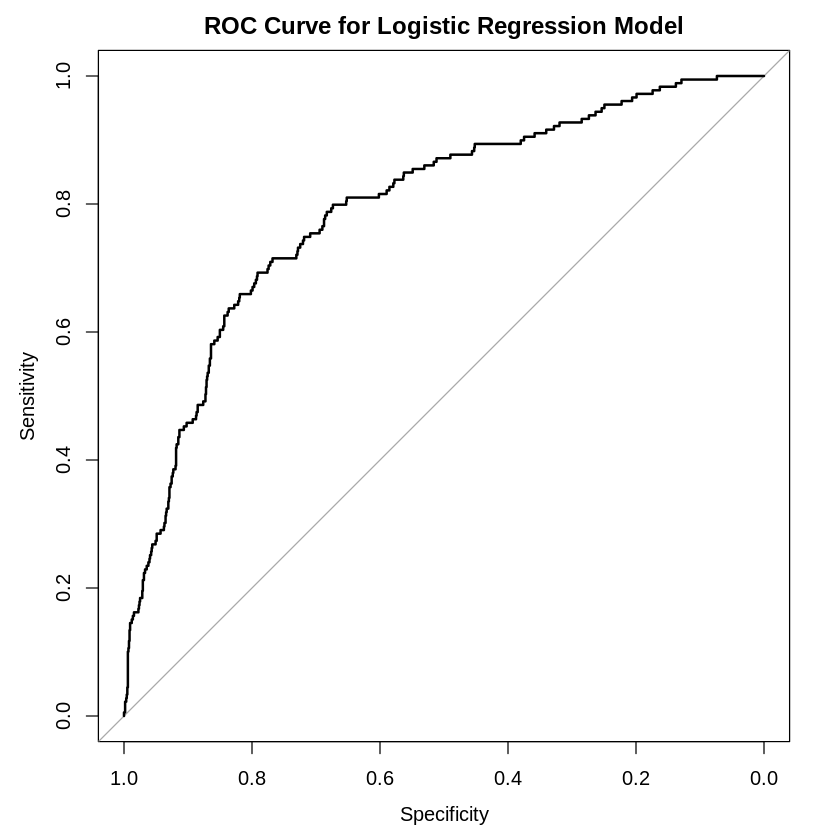

In [33]:
# Fit a logistic regression model using the training data
logistic_model <- glm(Churn ~ ., data = train_data_balanced, family = binomial)

# Display model summary
summary(logistic_model)

# Predict probabilities on the test data
test_probabilities <- predict(logistic_model, newdata = test_data, type = "response")

# Convert probabilities to class labels using a threshold of 0.5
predicted_classes <- ifelse(test_probabilities > 0.5, 1, 0)

# Evaluate model performance

# Confusion matrix
confusion_matrix <- table(Predicted = predicted_classes, Actual = test_data$Churn)
print(confusion_matrix)

# Accuracy
accuracy <- mean(predicted_classes == test_data$Churn)
cat("Accuracy:", accuracy, "\n")

# If you want to calculate the AUC, you can use the pROC package
if (!require("pROC")) install.packages("pROC")
library(pROC)

# Compute the ROC curve and AUC
roc_curve <- roc(test_data$Churn, test_probabilities)
cat("AUC:", auc(roc_curve), "\n")

# Plot the ROC curve
plot(roc_curve, main = "ROC Curve for Logistic Regression Model")


In [37]:
# Install the `car` package if not already installed
if (!require("car")) install.packages("car")
library(car)

# Fit the logistic regression model
logistic_model <- glm(Churn ~ ., data = train_data_balanced, family = binomial)

# Calculate VIF for each predictor
vif_values <- vif(logistic_model)

# Display VIF values
print(vif_values)

# Identify predictors with high multicollinearity (VIF > 5 or 10)
high_vif <- vif_values[vif_values > 5]
cat("Predictors with high VIF (> 5):\n")
print(high_vif)


        Account.length     International.plan        Voice.mail.plan 
          1.016951e+00           1.100152e+00           2.001116e+01 
 Number.vmail.messages      Total.day.minutes        Total.day.calls 
          2.000096e+01           1.240502e+07           1.012759e+00 
      Total.day.charge      Total.eve.minutes        Total.eve.calls 
          1.240505e+07           2.302148e+06           1.015050e+00 
      Total.eve.charge    Total.night.minutes      Total.night.calls 
          2.302103e+06           5.456003e+05           1.017769e+00 
    Total.night.charge     Total.intl.minutes       Total.intl.calls 
          5.456023e+05           6.712934e+04           1.021820e+00 
     Total.intl.charge Customer.service.calls 
          6.713482e+04           1.312036e+00 
Predictors with high VIF (> 5):
      Voice.mail.plan Number.vmail.messages     Total.day.minutes 
         2.001116e+01          2.000096e+01          1.240502e+07 
     Total.day.charge     Total.eve.minu

In [38]:
# Remove specified columns
churn_data <- churn_data[ , !(names(churn_data) %in% c("Total.intl.charge",
                                                       "Total.eve.charge",
                                                       "Total.night.charge",
                                                       "Total.day.charge"))]

# Verify removal by listing column names
names(churn_data)


[1] "Account.length"         "International.plan"     "Voice.mail.plan"       
 [4] "Number.vmail.messages"  "Total.day.minutes"      "Total.day.calls"       
 [7] "Total.eve.minutes"      "Total.eve.calls"        "Total.night.minutes"   
[10] "Total.night.calls"      "Total.intl.minutes"     "Total.intl.calls"      
[13] "Customer.service.calls" "Churn"

In [39]:
# Fit a logistic regression model
logistic_model <- glm(Churn ~ ., data = train_data_balanced, family = binomial)

# Display the summary of the model
summary(logistic_model)



Call:
glm(formula = Churn ~ ., family = binomial, data = train_data_balanced)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.653020   0.556769 -13.745  < 2e-16 ***
Account.length           0.001170   0.001103   1.061  0.28878    
International.planYes    2.089774   0.136362  15.325  < 2e-16 ***
Voice.mail.planYes      -3.618741   0.482598  -7.498 6.46e-14 ***
Number.vmail.messages    0.087698   0.014588   6.012 1.84e-09 ***
Total.day.minutes        2.890559   2.572991   1.123  0.26126    
Total.day.calls          0.001862   0.002100   0.887  0.37527    
Total.day.charge       -16.916232  15.135085  -1.118  0.26370    
Total.eve.minutes        0.575993   1.285501   0.448  0.65410    
Total.eve.calls          0.004643   0.002216   2.095  0.03613 *  
Total.eve.charge        -6.703706  15.123437  -0.443  0.65757    
Total.night.minutes     -0.500512   0.670848  -0.746  0.45561    
Total.night.calls       -0.002979   0.002235  -1

In [40]:
refined_model <- step(logistic_model, direction = "both")
summary(refined_model)


Start:  AIC=3275.6
Churn ~ Account.length + International.plan + Voice.mail.plan + 
    Number.vmail.messages + Total.day.minutes + Total.day.calls + 
    Total.day.charge + Total.eve.minutes + Total.eve.calls + 
    Total.eve.charge + Total.night.minutes + Total.night.calls + 
    Total.night.charge + Total.intl.minutes + Total.intl.calls + 
    Total.intl.charge + Customer.service.calls

                         Df Deviance    AIC
- Total.eve.charge        1   3239.8 3273.8
- Total.eve.minutes       1   3239.8 3273.8
- Total.night.minutes     1   3240.2 3274.2
- Total.night.charge      1   3240.2 3274.2
- Total.day.calls         1   3240.4 3274.4
- Account.length          1   3240.7 3274.7
- Total.day.charge        1   3240.8 3274.8
- Total.day.minutes       1   3240.9 3274.9
- Total.night.calls       1   3241.4 3275.4
<none>                        3239.6 3275.6
- Total.eve.calls         1   3244.0 3278.0
- Total.intl.minutes      1   3247.5 3281.5
- Total.intl.charge       1   3247.


Call:
glm(formula = Churn ~ International.plan + Voice.mail.plan + 
    Number.vmail.messages + Total.day.minutes + Total.eve.minutes + 
    Total.eve.calls + Total.night.calls + Total.night.charge + 
    Total.intl.minutes + Total.intl.calls + Total.intl.charge + 
    Customer.service.calls, family = binomial, data = train_data_balanced)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.327150   0.496029 -14.772  < 2e-16 ***
International.planYes    2.088157   0.136033  15.350  < 2e-16 ***
Voice.mail.planYes      -3.627812   0.483130  -7.509 5.96e-14 ***
Number.vmail.messages    0.087675   0.014596   6.007 1.89e-09 ***
Total.day.minutes        0.014825   0.000809  18.326  < 2e-16 ***
Total.eve.minutes        0.006148   0.000870   7.067 1.58e-12 ***
Total.eve.calls          0.004606   0.002211   2.083  0.03727 *  
Total.night.calls       -0.003176   0.002230  -1.424  0.15454    
Total.night.charge       0.095868   0.020338   4.

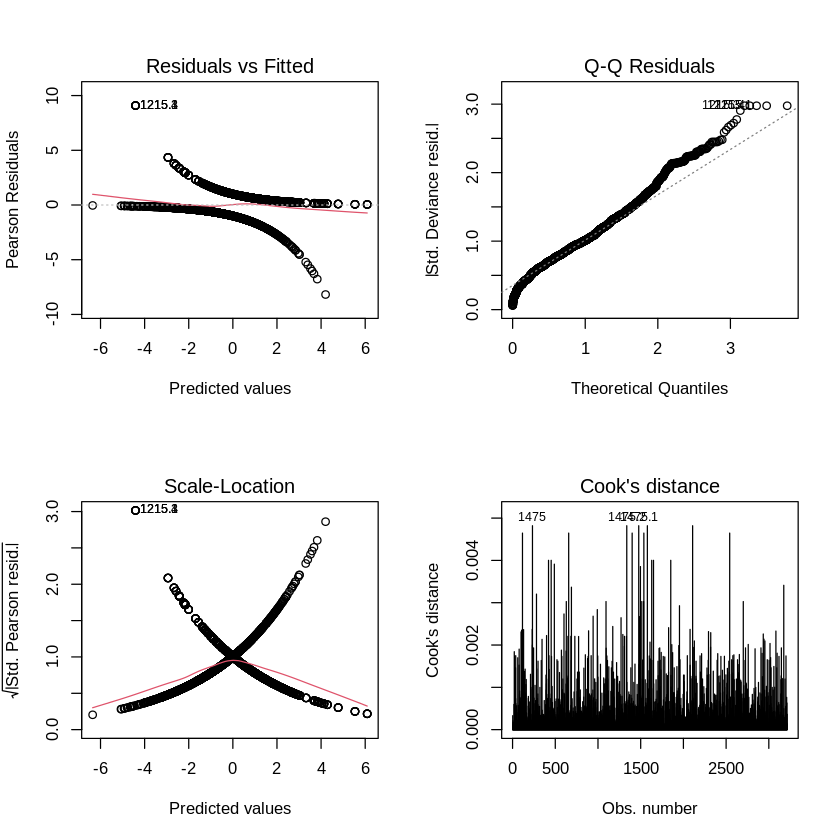

In [42]:
# Plot residuals
par(mfrow = c(2, 2))  # Arrange plots in a 2x2 grid
plot(logistic_model, which = 1:4)


In [41]:
# Predict probabilities for the test set
test_probabilities <- predict(logistic_model, newdata = test_data, type = "response")

# Convert probabilities to class labels
predicted_classes <- ifelse(test_probabilities > 0.5, 1, 0)

# Confusion matrix
confusion_matrix <- table(Predicted = predicted_classes, Actual = test_data$Churn)
print(confusion_matrix)

# Accuracy
accuracy <- mean(predicted_classes == test_data$Churn)
cat("Accuracy:", accuracy, "\n")


         Actual
Predicted   0   1
        0 889  52
        1 266 127
Accuracy: 0.7616192 


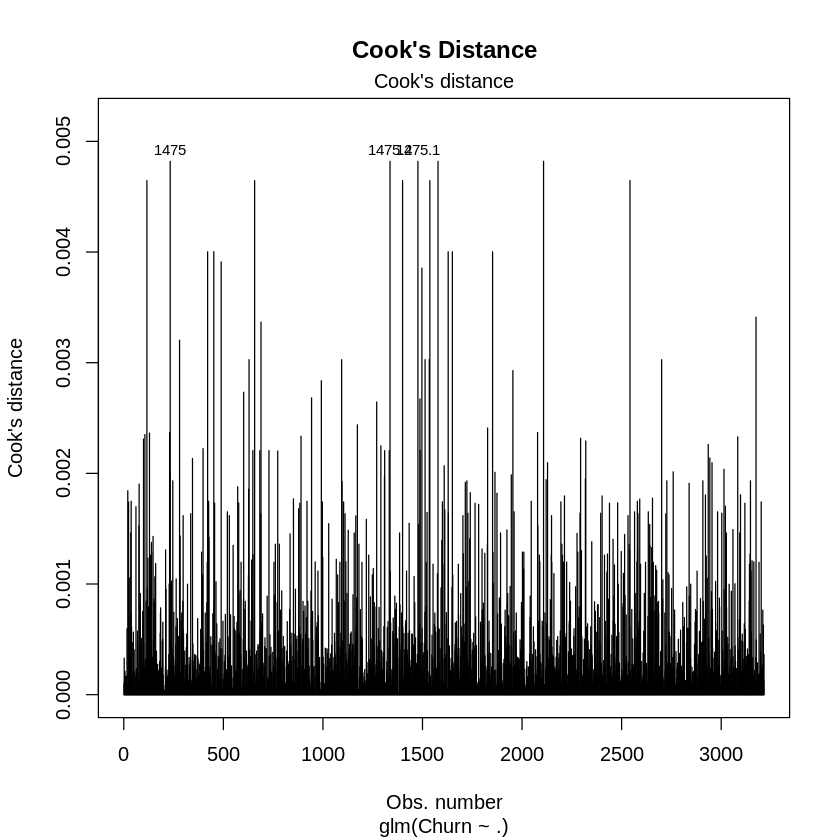

In [43]:
# Cook's Distance Plot
plot(logistic_model, which = 4, main = "Cook's Distance")


In [44]:
# Load the `car` package for VIF
if (!require("car")) install.packages("car")
library(car)

# Calculate VIF
vif_values <- vif(logistic_model)
print(vif_values)

# Identify predictors with VIF > 5 (moderate multicollinearity)
cat("Predictors with high VIF (>5):\n")
print(vif_values[vif_values > 5])


        Account.length     International.plan        Voice.mail.plan 
          1.016951e+00           1.100152e+00           2.001116e+01 
 Number.vmail.messages      Total.day.minutes        Total.day.calls 
          2.000096e+01           1.240502e+07           1.012759e+00 
      Total.day.charge      Total.eve.minutes        Total.eve.calls 
          1.240505e+07           2.302148e+06           1.015050e+00 
      Total.eve.charge    Total.night.minutes      Total.night.calls 
          2.302103e+06           5.456003e+05           1.017769e+00 
    Total.night.charge     Total.intl.minutes       Total.intl.calls 
          5.456023e+05           6.712934e+04           1.021820e+00 
     Total.intl.charge Customer.service.calls 
          6.713482e+04           1.312036e+00 
Predictors with high VIF (>5):
      Voice.mail.plan Number.vmail.messages     Total.day.minutes 
         2.001116e+01          2.000096e+01          1.240502e+07 
     Total.day.charge     Total.eve.minut

In [45]:
# Install and load ResourceSelection package
if (!require("ResourceSelection")) install.packages("ResourceSelection")
library(ResourceSelection)

# Perform Hosmer-Lemeshow test
hoslem_test <- hoslem.test(train_data_balanced$Churn, fitted(logistic_model))
print(hoslem_test)


Loading required package: ResourceSelection

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ResourceSelection’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’


ResourceSelection 0.3-6 	 2023-06-27

Warning message in Ops.factor(1, y):
“‘-’ not meaningful for factors”



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  train_data_balanced$Churn, fitted(logistic_model)
X-squared = NA, df = 8, p-value = NA



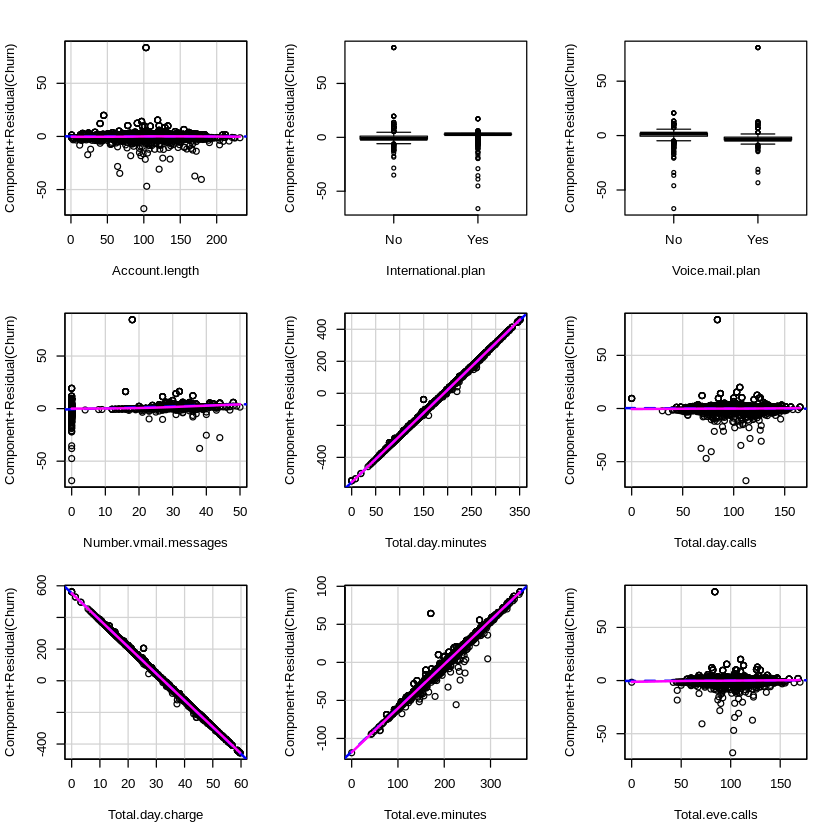

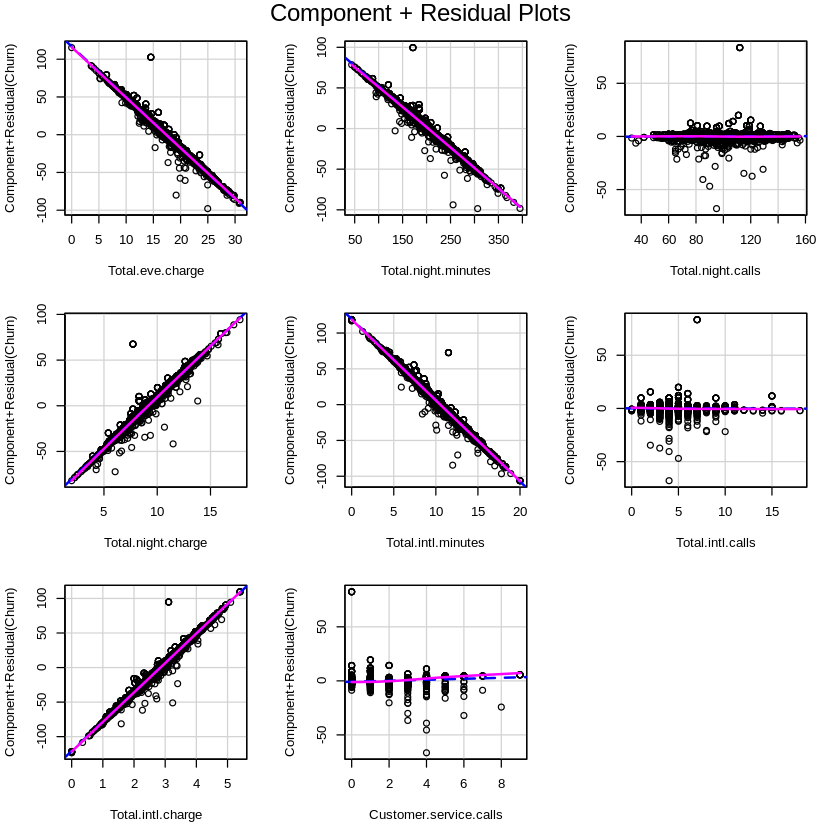

In [46]:
# Create partial residual plots for continuous variables
library(car)
crPlots(logistic_model)
